# Log Split Code

In [1]:
# import os
 
# def split_log_file(input_file_path, output_dir):
#     # Ensure the output directory exists
#     os.makedirs(output_dir, exist_ok=True)
 
#     # Read the input log file
#     with open(input_file_path, 'r', encoding='utf-8', errors='ignore') as input_file:
#         # Initialize variables
#         current_section = []
#         section_number = 1
 
#         # Helper function to write a section to a file
#         def write_section(section):
#             output_file_path = os.path.join(output_dir, f'section_{section_number}.log')
#             with open(output_file_path, 'w', encoding='utf-8') as output_file:
#                 output_file.writelines(section)
 
#         # Process each line in the log file
#         for line in input_file:
#             current_section.append(line)
 
#             # Check if the end pattern is found
#             if 'trading day:' in line:
#                 # Write the current section to a file
#                 write_section(current_section)
 
#                 # Reset for the next section
#                 current_section = []
#                 section_number += 1
 
# # Specify the path to the input log file and the output directory
# input_log_file_path = '/home/cloudcraftz/Downloads/HFT-Options-EIS-Global-backtest_2.0_dev/tradelib/log/hft_20240130154520933953.log'
# output_directory = '/home/cloudcraftz/Downloads/HFT-Options-EIS-Global-backtest_2.0_dev/tradelib/log/log_outputs'
 
# # Call the split_log_file function
# split_log_file(input_log_file_path, output_directory)

In [1]:
import os
 
def split_log_file(input_file_path, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
 
    # Read the input log file
    with open(input_file_path, 'r', encoding='utf-8', errors='ignore') as input_file:
        # Initialize variables
        current_section = []
        section_number = 1
        prev_date = 0
 
        # Helper function to write a section to a file
        def write_section(section, section_number):
            output_file_path = os.path.join(output_dir, f'section_{section_number}.log')
            with open(output_file_path, 'w', encoding='utf-8') as output_file:
                output_file.writelines(section)
 
        # Process each line in the log file
        for line in input_file:
 
            # Check if the end pattern is found
            if 'trading day:' in line:
                # Write the current section to a file
                new_date = line.split('trading day: ')[-1].split(' ')[0]
                write_section(current_section, section_number=prev_date)
 
                # Reset for the next section
                current_section = []
                # section_number += 1
                prev_date = new_date
 
            current_section.append(line)
 
# Specify the path to the input log file and the output directory
input_log_file_path = 'hft_20240207012348967070.log'
output_directory = './log'
 
# Call the split_log_file function
split_log_file(input_log_file_path, output_directory)

# Imports

In [3]:
import pandas as pd
import re, os
import glob
import gc
import json
import numpy as np
from datetime import timedelta, date, time, datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:

# data_dir = "/home/cloudcraftz/Downloads/2022"
# # data_dir = "/home/cloudcraftz/Downloads/NF_WK_2023_ALL/2023"
# meta_data_file_name = 'meta_data.json'
 
# trade_start_time = time(9, 20, 0)
# trade_end_time = time(15, 30, 0)
 
# spot_files = glob.glob(data_dir+"/Spot/*.csv")
# len(spot_files)

In [5]:
# result_dict = {}
 
# for i in spot_files:
#     df = pd.read_csv(i)
#     df['Date Time'] = pd.to_datetime(df['Date Time'])
#     df = df.set_index('Date Time')
#     if df.shape[0] == 375:
#         pass
 
#     else:
#         key = df.index[0].date()
#         value_list = []
#         time_itr = datetime.combine(key, trade_start_time)
        
#         while time_itr <= datetime.combine(key, trade_end_time):
#             try:
#                 df.loc[time_itr]
#             except Exception as e:
#                 value_list.append(time_itr.time())
#                 print(f"{time_itr}  ==> {e}")
 
#             time_itr = time_itr+timedelta(minutes=1)
 
#         result_dict[key] = value_list
 
#     del df
#     gc.collect()

In [9]:
Z = !grep "final " "./hft_20240208125030514894.log"

contract_info = pd.DataFrame(columns=["Contracts"])
for i in Z:
    try:
        year, month, day, hour, min, sec, contracts, _ = re.sub("[^0-9]", " ", i.split("INFO")[1]).split()
        date = pd.to_datetime("-".join([year, month, day]) + " " + ":".join([hour, min, sec]))
        contracts = int(contracts)

        contract_info.loc[date, "Contracts"] = contracts
    except:
        pass

In [12]:
# contract_info.plot()

In [8]:
# import pandas as pd
# import re

# def process_log_file(log_file_path):
#     contract_info = pd.DataFrame(columns=["Contracts"])

#     try:
#         with open(log_file_path, 'r') as file:
#             for line in file:
#                 if "final " in line:
#                     try:
#                         year, month, day, hour, min, sec, contracts, _ = re.sub("[^0-9]", " ", line.split("INFO")[1]).split()
#                         date = pd.to_datetime("-".join([year, month, day]) + " " + ":".join([hour, min, sec]))
#                         contracts = int(contracts)

#                         contract_info.loc[date, "Contracts"] = contracts
#                     except Exception as e:
#                         print(f"Error processing line: {line}\nError: {e}")

#     except FileNotFoundError:
#         print(f"File not found: {log_file_path}")
#     except Exception as e:
#         print(f"An error occurred: {e}")

#     return contract_info

# # Example usage:
# log_file_path = "hft_20240205190556965607.log"
# resulting_dataframe = process_log_file(log_file_path)

# # Display the resulting DataFrame
# print(resulting_dataframe)

<Axes: >

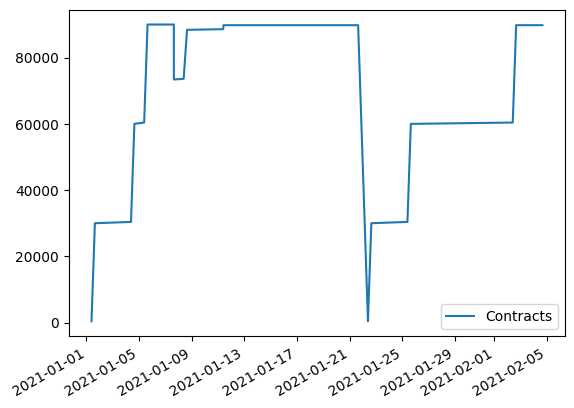

In [13]:
contract_info.plot()

In [13]:
# contract_info[-300:-250]

In [14]:
# contract_info[contract_info['Contracts'] > 90000]

In [14]:
# contract_info

In [15]:
# contract_info = contract_info.resample("D").last().dropna()

In [16]:
# contract_info.to_excel("contract_info_daily_2023_NIFTY.xlsx")

In [17]:
# contract_info.to_excel("contract_info.xlsx")
# contract_info = pd.read_excel("contract_info.xlsx", index_col=0, parse_dates=True)
# contract_info = contract_info.loc[:"2023-04-13"]

# contract_info_base = pd.read_excel("baseline_2019_BANKNIFTY.xlsx", index_col=0, parse_dates=True)
# contract_info_base = contract_info_base.loc[:"2023-04-13"]

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = contract_info.index,
    y = contract_info['Contracts'],
    name="Constant Risk"
))

fig.update_layout(plot_bgcolor="white", xaxis_title="Date", yaxis_title="No. of Contract", title=f"No. of Contracts (Constant Risk)| NIFTY Jan-2023 - Dec-2023 | (C.B - 90K, Avg Contract - {round(contract_info['Contracts'].mean()/1000)}K)", font=dict(
    family = "Courier new, monospace",
    size = 12
))

fig.update_xaxes(
                mirror=True,
                ticks='outside',
                showline=True,
                linecolor='black',
                gridcolor='white')
 
fig.update_yaxes(
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='white')

In [11]:
contract_info[contract_info['Contracts'] <= 200]

,Contracts
2022-01-07 09:20:00,200
2022-01-14 09:20:00,200
2022-01-21 09:20:00,200
2022-01-28 09:20:00,200
2022-02-04 09:20:00,200
2022-02-11 09:20:00,200
2022-02-18 09:20:00,200
2022-02-25 09:20:00,200
2022-03-04 09:20:00,200


In [49]:
# import plotly.graph_objects as go
# import numpy as np
# import pandas as pd
# from scipy.stats import mode
 
# # Generate random data for the histogram
# # np.random.seed(42)
# # data = pd.read_excel('./constant_contract_timeseries.xlsx')
# data = contract_info_base['Contracts']
 
# # Create a histogram
# fig = go.Figure()
 
# histogram_trace = go.Histogram(
#     x=data,
#     nbinsx=15,  # Number of bins
#     # marker=dict()
# )
# # layout = go.Layout(title=f'Number of Expiry Days Available in Each Trading Day | BankNifty Weekly 2023', xaxis=dict(title='Date'), yaxis=dict(title='Frequency'))
 
# mean = data.mean()
# median = np.median(data)
# mode = mode(data).mode
 
# # std
# posi_2_std = mean + (2*data.std())
# neg_2_std = mean - (2*data.std())
 
# fig = go.Figure(data=[histogram_trace])
 
# # Update layout for better visualization
# fig.update_layout(
#     title='Histogram Example',
#     xaxis=dict(title='Values'),
#     yaxis=dict(title='Frequency'),
# )
 
# arrow_position = data
 
# fig.add_vline(x=mode, line_width=3, line_dash="dash", line_color="red")
# fig.add_vline(x=mean, line_width=3, line_dash="dash", line_color="green")
# fig.add_vline(x=median, line_width=3, line_dash="dash", line_color="black")
 
# fig.add_annotation(x=mean, y = 15,
#     text=f"Mean(μ)={round(mean/1000, 2)}K",
#     ax=-80,
#     ay=-60,
#     showarrow=True,
#     # font=dict(size=self.graph_font_size),
#     arrowhead=1,
# )
 
# fig.add_annotation(x=median, y = 15,
#     text=f"Median(x̃)={round(median/1000, 2)}K",
#     ax=80,
#     ay=-60,
#     showarrow=True,
#     # font=dict(size=self.graph_font_size),
#     arrowhead=1,
# )
 
# fig.add_annotation(x=mode, y = 15,
#     text=f"Mode={round(mode/1000)}K",
#     ax=-80,
#     ay=-40,
#     showarrow=True,
#     # font=dict(size=self.graph_font_size),
#     arrowhead=1,
# )
 
# fig.update_layout(plot_bgcolor="white", xaxis_title="Contracts", yaxis_title="No. of Days", title="Distribution of Contracts | BANKNIFTY Jan-2023 - Apr-2023| Baseline", font=dict(
#     family = "Courier new, monospace",
#     size = 12
# ))

# fig.update_xaxes(
#                 mirror=True,
#                 ticks='outside',
#                 showline=True,
#                 linecolor='black',
#                 gridcolor='white')
 
# fig.update_yaxes(
#             mirror=True,
#             ticks='outside',
#             showline=True,
#             linecolor='black',
#             gridcolor='white')
 
 
# # Show the plot
# fig.show()

In [1]:
import os
import json
import glob
import pandas as pd

In [7]:
data = json.load(open('/home/cloudcraftz/Downloads/Constant Risk Data/2023/meta_data.json'))
spot_data_path = "/home/cloudcraftz/Downloads/Constant Risk Data/2023/Spot/"
 
ul = "NIFTY"
end = "_Intraday_Spot.csv"
 
# spot_file
 
os.makedirs(spot_data_path, exist_ok=True)
 
for i in data['Trading_dates']:
    try:
        data_files = glob.glob(f"/home/cloudcraftz/Downloads/Constant Risk Data/2023/{ul}_{i.replace('-', '')}_*.csv")
    
        date_files_list = []
        for file in data_files:
            df = pd.read_csv(file)
            date_files_list.append(df[['Date Time', 'Spot']])
        
        spot_df = pd.concat(date_files_list, ignore_index=True)
        final_spot_df = spot_df.drop_duplicates().reset_index(drop=True)
    
        spot_file = ul+'_'+i.replace('-', '')+end
    
        final_spot_df.to_csv(os.path.join(spot_data_path, spot_file))
    
        # print(f"Complete {i}")
    except Exception as e:
        print(f'Error {i}')

In [52]:
# /home/cloudcraftz/Downloads/HFT-Options-EIS-Global-(alpha_v06_dev)/datasets/data_files/NIFTY Weekly/2023

In [53]:
# import json
# import os
# from datetime import timedelta, datetime

In [54]:
# from datetime import date

In [55]:
# data_dir = '/home/cloudcraftz/Downloads/BN_WK_2019_All_Exp'

# file = open(os.path.join(data_dir, "meta_data.json"))
# metadata = json.load(file)
 
# expiry_date_set = list(map(lambda x: datetime.strptime(x, "%Y-%m-%d").date(), metadata['Expiry_dates']))
# trade_date_set = list(map(lambda x: datetime.strptime(x, "%Y-%m-%d").date(), metadata['Trading_dates']))
 
# unwind_dict = {}
# curr_year = 2019
# for date1 in expiry_date_set:
#     if date1 in trade_date_set:
#         unwind_dict[date1.strftime("%Y-%m-%d")] = date1.strftime("%Y-%m-%d")
 
#     else:
#         if date1.year > curr_year:
#             last_trading_day_of_the_year = trade_date_set[-1]
 
#             print(f"For {date1} unwind date is {last_trading_day_of_the_year}")
#             unwind_dict[date1.strftime("%Y-%m-%d")] = last_trading_day_of_the_year.strftime("%Y-%m-%d")
 
#         else:
#             is_run = True
#             date2 = date1
#             while is_run:
#                 date2 = date2 - timedelta(days=1)
 
#                 if date2 in trade_date_set:
#                     print(f"For {date1} unwind date is {date2}")
#                     unwind_dict[date1.strftime("%Y-%m-%d")] = date2.strftime("%Y-%m-%d")
#                     is_run = False
        
#         # print(date)
#     # break

In [56]:
# data_info = {
#     # "Trading_dates": trade_date_set,
#     # "Expiry_dates": expiry_date_set,
#     "Unwind_dates": unwind_dict
# }
 
# # Specify the file path where you want to save the JSON
# json_file_path = os.path.join(data_dir, "meta_data2.json") #'output.json'
 
# def convert_to_json_serializable(obj):
#     if isinstance(obj, date):
#         return obj.isoformat()  # Convert date to string
#     raise TypeError(f"Object of type {type(obj)} is not JSON serializable")
 
 
# # json_file_path = os.path.join(path, "meta_data.json")
# # Save the dictionary to a JSON file
# with open(json_file_path, 'w') as json_file:
#     json.dump(data_info, json_file)

In [57]:
# def preprocess_eis_data(data:pd.DataFrame) -> pd.DataFrame:
#     try:
#         # drop column UnixTimefrom 1-1-1980
#         # data.drop(['UnixTimefrom 1-1-1980'], axis = 1, inplace = True)

#         # convert object type to float type
#         float_col_list = ['BidPrice','BidQty','AskPrice', 'AskQty','TTq','LTP','TotalTradedPrice','Strike']
#         data[float_col_list] = data[float_col_list].astype('float64')

#         # convert ExchToken type to int type
#         data['ExchToken'] = data['ExchToken'].astype('int64') # as per requirement

#         # convert Object columns to string
#         str_col_list = ["Instrument", "ExpiryDate", "ExpiryTime", "Type", "Date Time"]
#         data[str_col_list] = data[str_col_list].astype('str')

#         # remove white spaces
#         data = data.apply(lambda x: x.str.strip() if type(x) == "<class 'str'>" else x)

#         for col in str_col_list:
#             data[col] = data[col].str.strip()

#         # create new feature ExpiryDateTime
#         data['ExpiryDate'] = pd.to_datetime(data['ExpiryDate'],format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
#         data['ExpiryDateTime'] = data['ExpiryDate'] + ' ' + data['ExpiryTime']

#         # cleanup the wrong data
#         to_drop = data[~((data['Type'] == 'XX') | (data['Strike'] == -0.01) | (data['BidPrice'] > data['AskPrice']) | (data['BidQty'] == 0.0) | (data['AskQty'] == 0.0))].index
#         data = data.iloc[to_drop]

#         # convert the date columns date time format
#         data['ExpiryDate'] = pd.to_datetime(data['ExpiryDate'])
#         data['ExpiryDateTime'] = pd.to_datetime(data['ExpiryDateTime'])
#         data['Date Time'] = pd.to_datetime(data['Date Time'])

#         # set the Date time column into the index of the data
#         data.set_index('Date Time', inplace = True)

#         # divide the bid, ask price and strike by 100 since these are in paisa
#         data['BidPrice'] = data['BidPrice']/100
#         data['AskPrice'] = data['AskPrice']/100
#         data['Strike'] = data['Strike']/100

#         return data
#     except Exception as ex:
#         print(f"Error : {ex}")

In [58]:
# data = pd.read_excel("forward_spot.xlsx", parse_dates=True, sheet_name="Sheet2")
# data = preprocess_eis_data(data=data)

In [59]:
# df = pd.DataFrame()

# for strike in data['Strike'].unique():

#     if len(data[(data['Strike']==strike)]) > 1:

#         call_bid, call_ask = data[(data['Strike']==strike) & (data['Type']=="CE")][['BidPrice', 'AskPrice']].values[0]
#         put_bid, put_ask = data[(data['Strike']==strike) & (data['Type']=="PE")][['BidPrice', 'AskPrice']].values[0]
        
#         df.loc[strike , ["callBid", "callAsk", "putBid", "putAsk"]] = [call_bid, call_ask, put_bid, put_ask]
#     # break

# df.index.name = "Strikes"
# df = df.reset_index()

In [60]:
# df['syn_bid'] = df['Strikes'] + df['callBid'] - df['putAsk']
# df['syn_ask'] = df['Strikes'] + df['callAsk'] - df['putBid']

In [61]:
# (df['syn_bid'].max() + df['syn_ask'].min()) / 2

In [62]:
# tf = df.drop([1])
# (tf['syn_bid'].max() + tf['syn_ask'].min()) / 2

In [4]:
data = pd.read_csv("blotter_20230112092000_20230112153000.csv", index_col=0)

In [6]:
data.loc["2023-01-12 15:16:00":]

,trade_id,packet_id,component_trade_id,trade_component,instrument_id,instrument_id_key,position,trade_sub_type,instrument_object
timestamp,,,,,,,,,
2023-01-12 15:16:00,359,174,1,unwind_component,50159,NIFTY_18900_CE_20230112,-1950.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,360,174,1,unwind_component,49649,NIFTY_17100_PE_20230112,-1950.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,361,174,1,unwind_component,49715,NIFTY_18050_CE_20230112,1400.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,362,174,1,unwind_component,50161,NIFTY_18950_CE_20230112,-700.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,363,174,1,unwind_component,49652,NIFTY_17150_PE_20230112,-700.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,364,174,1,unwind_component,49706,NIFTY_18000_PE_20230112,4400.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,365,174,1,unwind_component,49703,NIFTY_17950_CE_20230112,-12150.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,366,174,1,unwind_component,50139,NIFTY_18850_CE_20230112,-2400.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
2023-01-12 15:16:00,367,174,1,unwind_component,49643,NIFTY_17050_PE_20230112,-2400.0,unwind,"{'detailed': True, 'instrument_type': 'option'..."
